In [7]:
# === IMPORT LIBRARY ===
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

In [8]:
# === MOUNT GOOGLE DRIVE ===
drive.mount('/content/drive')

# === BACA DATASET ===
glcm_path = "/content/drive/MyDrive//Ekstraksi_GLCM&LBP_(fix).csv"
data = pd.read_csv(glcm_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



=== Training SVM untuk GLCM ===
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Params GLCM: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Akurasi GLCM: 0.9547325102880658


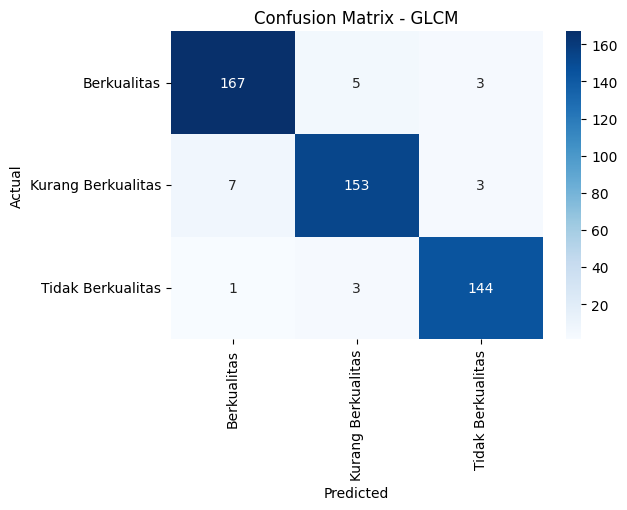

                    precision    recall  f1-score   support

       Berkualitas       0.95      0.95      0.95       175
Kurang Berkualitas       0.95      0.94      0.94       163
 Tidak Berkualitas       0.96      0.97      0.97       148

          accuracy                           0.95       486
         macro avg       0.95      0.96      0.96       486
      weighted avg       0.95      0.95      0.95       486

Presisi GLCM: 0.9548654244306419
Recall GLCM: 0.9553029980023845
F1-score GLCM: 0.9550577039167644


In [9]:
# === PILIH FITUR YANG TEPAT SAJA UNTUK GLCM ===
# Kolom fitur untuk ekstraksi GLCM
glcm_feature_cols = ['contrast_glcm', 'correlation_glcm', 'energy_glcm', 'homogeneity_glcm', 'entropy_glcm',
                     'variance_glcm', 'skewness_glcm', 'std_dev_glcm']
X_glcm = data[glcm_feature_cols]
y_glcm = data['kelas_kualitas']

# === SPLIT DATA (80:20) UNTUK GLCM ===
X_train_glcm, X_test_glcm, y_train_glcm, y_test_glcm = train_test_split(X_glcm, y_glcm, test_size=0.2, random_state=42)

# === STANDARD SCALING UNTUK GLCM ===
scaler_glcm = StandardScaler()
X_train_glcm = scaler_glcm.fit_transform(X_train_glcm)
X_test_glcm = scaler_glcm.transform(X_test_glcm)

# === PARAMETER GRID UNTUK SVM ===
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1],
    'kernel': ['rbf', 'linear', 'poly']
}

# === TRAINING DAN EVALUASI UNTUK SVM GLCM ===
print("\n=== Training SVM untuk GLCM ===")
svm_glcm = SVC(random_state=42)
grid_glcm = GridSearchCV(svm_glcm, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_glcm.fit(X_train_glcm, y_train_glcm)

best_glcm = grid_glcm.best_estimator_
y_pred_glcm = best_glcm.predict(X_test_glcm)

print("Best Params GLCM:", grid_glcm.best_params_)
print("Akurasi GLCM:", accuracy_score(y_test_glcm, y_pred_glcm))

# Confusion Matrix GLCM
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_glcm, y_pred_glcm),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=best_glcm.classes_,
            yticklabels=best_glcm.classes_)
plt.title("Confusion Matrix - GLCM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Metrics GLCM
print(classification_report(y_test_glcm, y_pred_glcm))
print("Presisi GLCM:", precision_score(y_test_glcm, y_pred_glcm, average='macro'))
print("Recall GLCM:", recall_score(y_test_glcm, y_pred_glcm, average='macro'))
print("F1-score GLCM:", f1_score(y_test_glcm, y_pred_glcm, average='macro'))


=== Training SVM untuk LBP ===
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Params LBP: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Akurasi LBP: 0.7626886145404664


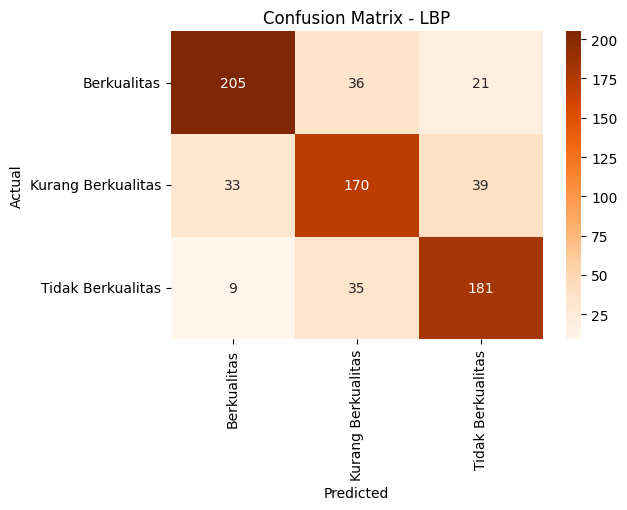

                    precision    recall  f1-score   support

       Berkualitas       0.83      0.78      0.81       262
Kurang Berkualitas       0.71      0.70      0.70       242
 Tidak Berkualitas       0.75      0.80      0.78       225

          accuracy                           0.76       729
         macro avg       0.76      0.76      0.76       729
      weighted avg       0.76      0.76      0.76       729

Presisi LBP: 0.76213034981325
Recall LBP: 0.7631221771263409
F1-score LBP: 0.7620862546883478


In [10]:
# === PILIH FITUR YANG TEPAT SAJA UNTUK LBP ===
# Kolom fitur untuk ekstraksi LBP
lbp_feature_cols = ['contrast_lbp', 'entropy_lbp', 'homogeneity_lbp', 'variance_lbp', 'energy_lbp',
                    'skewness_lbp', 'std_dev_lbp']
X_lbp = data[lbp_feature_cols]
y_lbp = data['kelas_kualitas']

# === SPLIT DATA (80:20) UNTUK LBP ===
X_train_lbp, X_test_lbp, y_train_lbp, y_test_lbp = train_test_split(X_lbp, y_lbp, test_size=0.3, random_state=42)

# === STANDARD SCALING UNTUK LBP ===
scaler_lbp = StandardScaler()
X_train_lbp = scaler_lbp.fit_transform(X_train_lbp)
X_test_lbp = scaler_lbp.transform(X_test_lbp)

# === TRAINING DAN EVALUASI UNTUK SVM LBP ===
print("\n=== Training SVM untuk LBP ===")
svm_lbp = SVC(random_state=42)
grid_lbp = GridSearchCV(svm_lbp, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_lbp.fit(X_train_lbp, y_train_lbp)

best_lbp = grid_lbp.best_estimator_
y_pred_lbp = best_lbp.predict(X_test_lbp)

print("Best Params LBP:", grid_lbp.best_params_)
print("Akurasi LBP:", accuracy_score(y_test_lbp, y_pred_lbp))

# Confusion Matrix LBP
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_lbp, y_pred_lbp),
            annot=True, fmt='d', cmap='Oranges',
            xticklabels=best_lbp.classes_,
            yticklabels=best_lbp.classes_)
plt.title("Confusion Matrix - LBP")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Metrics LBP
print(classification_report(y_test_lbp, y_pred_lbp))
print("Presisi LBP:", precision_score(y_test_lbp, y_pred_lbp, average='macro'))
print("Recall LBP:", recall_score(y_test_lbp, y_pred_lbp, average='macro'))
print("F1-score LBP:", f1_score(y_test_lbp, y_pred_lbp, average='macro'))